In [1]:
# notebook para análise de arquivo csv obtido via web scraping
# o site fonte é o Meteoritical Bulletin Database, da The Meteoritical Society, e conta atualmente com
# 100 registros de meteoritos no Brasil (link: https://www.lpi.usra.edu/meteor/)

In [2]:
####### faltando:
# inserir descrição das colunas e unidades usadas(se numérico) - do DataBase
# detalhar fonte do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log, e
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/meteoritos_brasil.csv')
df.head(3)

,web-scraper-order,web-scraper-start-url,Name,Status,Fall,Year,Place,Type,Mass,MetBull
0,1685536964-1,https://www.lpi.usra.edu/meteor/metbull.php?se...,Angra dos Reis (stone),Official,Y,1869,"Rio de Janeiro, Brazil",Angrite,1500 g,NaN
1,1685536964-2,https://www.lpi.usra.edu/meteor/metbull.php?se...,Araguainha **,Crater,NaN,254.7 ± 2.5 Ma,"Mato Grosso, Brazil",Impact Crater,NaN,NaN
2,1685536964-3,https://www.lpi.usra.edu/meteor/metbull.php?se...,Arraias **,Official,NaN,2015,"Tocantins, Brazil","Iron, IIAB",25 kg,108.0


In [3]:
df = df.drop(columns=['web-scraper-order','web-scraper-start-url'])

In [6]:
df.head(10)

,Name,Status,Fall,Year,Place,Type,Mass,MetBull
0,Angra dos Reis (stone),Official,Y,1869,"Rio de Janeiro, Brazil",Angrite,1500 g,NaN
1,Araguainha **,Crater,NaN,254.7 ± 2.5 Ma,"Mato Grosso, Brazil",Impact Crater,NaN,NaN
2,Arraias **,Official,NaN,2015,"Tocantins, Brazil","Iron, IIAB",25 kg,108.0
3,Augusto Pestana **,Official,NaN,1977,"Rio Grande do Sul, Brazil","Iron, IIIE",24 kg,111.0
4,Avanhandava,Official,Y,1952,"Sao Paulo, Brazil",H4,9.33 kg,NaN
5,Balsas **,Official,NaN,1974,"Maranhao, Brazil","Iron, IIIAB",41 kg,82.0
6,Barbacena,Official,NaN,1918,"Minas Gerais, Brazil","Iron, ungrouped",9.03 kg,NaN
7,Bendegó,Official,NaN,1784,"Bahia, Brazil","Iron, IC",5.36 t,NaN
8,Bezerros,Doubtful,Y,1915,"Pernambuco, Brazil",Doubtful Iron,NaN,NaN
9,Blumenau **,Official,NaN,1986,"Santa Catarina, Brazil","Iron, IVA",NaN,82.0


In [7]:
np.shape(df) #verificando no. de registros do dataset

(100, 8)

#### Massa média dos meteoros que atingem o Brasil
- A coluna Mass apresenta dados não homogeneizados, as unidades encontradas são g, kg e t. Também apresenta registros de massa desconhecida (algumas são crateras)

In [8]:
def converter_em_gramas(massa):
    "recebe uma massa em string e converte para um float (em gramas)"
    if massa != massa:  # é verdadeiro para NaN, caso das crateras
        return massa
    valor, unidade = massa.split(' ')
    valor = float(valor) # casting da magnitude
    if unidade == "g":    
        return valor
    if unidade == "kg": # 1kg = 1000g
        return valor * 1000
    if unidade == "t": # 1t = 1000000g
        return valor * 1000000


In [9]:
converter_em_gramas(df['Mass'][0])

1500.0

In [10]:
converter_em_gramas(df['Mass'][1]) # testando valores das crateras

nan

In [11]:
# Homogeneizando coluna da Mass (os valores devem ser em gramas ou nan)
mass_g = [converter_em_gramas(m) for m in df['Mass']]
df['Mass'] = mass_g

In [12]:
# análise descritiva da massa dos meteoritos
mean_mass = np.mean(df['Mass'])
mean_mass

224876.70229885058

In [13]:
df['Mass'].describe()

count    8.700000e+01
mean     2.248767e+05
std      9.754596e+05
min      1.500000e+01
25%      9.515000e+02
50%      7.000000e+03
75%      4.450000e+04
max      7.000000e+06
Name: Mass, dtype: float64

In [14]:
var_mass = np.var(df['Mass']); var_mass

940584355487.5277

In [15]:
std_mass = np.std(df['Mass']); std_mass

969837.2829952083

Obtemos que a massa média dos meteoritos brasileiros é cerca de 224.9 kg. Este dado não reflete bem os valores observados, pois possuem uma perceptível distorção em magnitude: enquanto algumas rochas apresentam algumas gramas, outras são melhor medidas em toneladas. Em termos numéricos, temos que a desvio-padrão da Mass é grande(std_mass). Será usada outra medida de centralidade, a mediana.

["Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos."](https://statplace.com.br/blog/como-interpretar-um-boxplot/)

In [16]:
median_mass = np.median(df['Mass'].dropna())
median_mass

7000.0

A mediana das massas é 7kg. O que é um valor mais aproximada para os meteoritos menores que se apresentam em maior quantidade que meteoritos gigantes.  Outra forma usada para observar o comportamento da massa será o boxplot, para termos uma visão mais ampla dos valores apresentados:

In [17]:
#df.boxplot(column=['Mass']) # apresenta valores distantes entre si, boxplot compactado em linha
# criando nova coluna para Mass, utilizando função logarítmica
log_mass = [log(m) for m in df['Mass']]
df['log_Mass'] = log_mass # adicionando coluna ao dataset
df.head(3)

,Name,Status,Fall,Year,Place,Type,Mass,MetBull,log_Mass
0,Angra dos Reis (stone),Official,Y,1869,"Rio de Janeiro, Brazil",Angrite,1500.0,NaN,7.313220
1,Araguainha **,Crater,NaN,254.7 ± 2.5 Ma,"Mato Grosso, Brazil",Impact Crater,NaN,NaN,NaN
2,Arraias **,Official,NaN,2015,"Tocantins, Brazil","Iron, IIAB",25000.0,108.0,10.126631


In [18]:
df['log_Mass'].describe()

count    87.000000
mean      8.809842
std       2.708725
min       2.708050
25%       6.857708
50%       8.853665
75%      10.700142
max      15.761421
Name: log_Mass, dtype: float64

<Axes: >

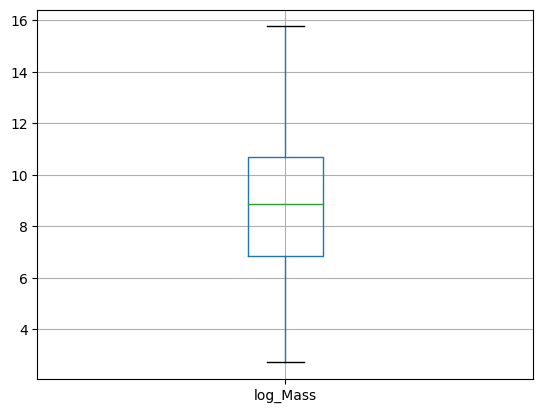

In [19]:
df.boxplot(column=['log_Mass'])

Algumas observações - leitura do Boxplot log_Mass:
- A  massa dos meteoritos registrados varia entre e**(2.708725) e e**(15.761421)
- O 1o quartil (do mínimo até 25% dos valores da amostra, excetuando outliers) está entre e**(2.708725) e e**(6.857708)
- O 2o quartil (de 25% até 50% dos valores) está entre e**(6.857708) e e**(8.853665)
- A mediana dos valores é 8.85366542803745
- O 3o quartil (de 50% até 75% dos valores) está entre e**(8.853665) e e**(10.700142)
- O 4o quartil (de 75% ao máximo, excetuando outliers) está entre e**(10.700142) e e**(15.761421) 
- Não são encontrados outliers
------
- A dispersão entre os dados(log da massa) é observada pela diferença entre o 3o e 1o quartis
- a dispersão desta coluna é aproximadamente simétrica. A coluna Mass é assimétrica (?).


In [20]:
e**(2.708725)

15.010125399386798

In [21]:
e**(6.857708)

951.18445240487

In [22]:
e**(8.853665)

6999.997003738482

In [23]:
e**(10.700142)

44362.15410894323

In [24]:
e**(15.761421)

7000002.050863185

Portanto, temos que 25% dos meteoritos registrados que atingiram o Brasil tinham massa inferior a 1kg (entre 15g e 951g).
Metade dos meteoritos registrados a atingirem o Brasil tinham massa entre 951g e 44.4kg.
Os outros 25% possuem massa superior a 44.4kg, registrando um valor extremo de 7000kg (7 toneladas).

#### Maiores meteoritos a atingir o Brasil

In [25]:
top_meteorites = df.sort_values(by=['Mass'],ascending=False,na_position='last')
top_meteorites.iloc[0:9]

,Name,Status,Fall,Year,Place,Type,Mass,MetBull,log_Mass
73,Santa Catharina,Official,NaN,1875,"Santa Catarina, Brazil","Iron, IAB-ung",7000000.0,NaN,15.761421
7,Bendegó,Official,NaN,1784,"Bahia, Brazil","Iron, IC",5360000.0,NaN,15.494475
14,Campinorte **,Official,NaN,1992,"Goias, Brazil","Iron, ungrouped",2000000.0,99.0,14.508658
75,Santa Luzia,Official,NaN,1921,"Goias, Brazil","Iron, IIAB",1920000.0,NaN,14.467836
35,Itapuranga **,Official,NaN,NaN,"Goias, Brazil","Iron, IAB-MG",628000.0,58.0,13.350295
50,Nova Petropolis **,Official,NaN,1967,"Rio Grande do Sul, Brazil","Iron, IIIAB",305000.0,62.0,12.628067
66,Putinga,Official,Y,1937,"Rio Grande do Sul, Brazil",L6,300000.0,NaN,12.611538
71,Sanclerlandia **,Official,NaN,1971,"Goias, Brazil","Iron, IIIAB",279000.0,58.0,12.538967
65,Porto Alegre **,Official,NaN,2005,"Rio Grande do Sul, Brazil","Iron, IIIE",200000.0,99.0,12.206073


Conforme identificado no limite da massa, o maior meteorito pesa 7t. Dos 10 maiores meteoritos, 90% foram encontrados nas regiões Sudeste e Centro-Oeste do Brasil. No Nordeste, o meteorito de Bendegó ocupa 2ª posição do ranking.

### Contabilizar meteoritos por ano
Verificarmos os registros de meteoritos a cada ano a partir de uma visualização gráfica
Como verificado, os valores dos anos também se apresentam em string. Alguns registros datam com terminação de tempo geológico, como Ma. Essa sigla é usada na Geologia para representar "mega annum" e quantifica um milhão de anos antes da data presente (Fonte: [Digital Atlas of Ancient Life](https://www.digitalatlasofancientlife.org/learn/geological-time/#:~:text=Abbreviating%20geological%20time&text=Similarly%2C%20one%2Dmillion%20years%20is,or%20millions%20of%20years%20ago.)). Outros, pois dois anos, indicando incongruências entre os boletins de onde foram extraídos. Como não há possibilidade de determinação precisa desses anos, optou-se por analisar apenas os registros datados em 4 dígitos para o ano.

In [26]:
type(df['Year'][0])

str

In [27]:
df['Year'].describe() # há 70 anos únicos 3 não datados

count       97
unique      70
top       1960
freq         4
Name: Year, dtype: object

In [26]:
def validar_ano(ano):
    """receebe um ano em string e retorna se ele tem formato AAAA"""
    if ano != ano:
        return False
    return len(ano)==4
valid_years = [a for a in df['Year'] if validar_ano(a)]
# def label_anos(anos):
#     """Cria os valores de ano para o eixo x"""
#     unique_anos = []
#     for ano in anos:
#         ano = int(ano)
#         if ano in unique_anos:
#             continue
#         else:
#             unique_anos += ano
#     return unique_anos
# anos = label_anos(valid_years)


In [38]:
df_valid_years = df[df['Year'].isin(valid_years)] # filtra o dataset para anos válidos
# ordena as ocorrências pela data
df_valid_years = df_valid_years.sort_values(by="Year", ascending=True, ignore_index=False) 
df_valid_years.head(5)

,Name,Status,Fall,Year,Place,Type,Mass,MetBull
7,Bendegó,Official,NaN,1784,"Bahia, Brazil","Iron, IC",5.36 t,NaN
25,Curvello,Doubtful,Y,1833,"Minas Gerais, Brazil",Doubtful meteorite,218 g,NaN
38,Macau,Official,Y,1836,"Rio Grande do Norte, Brazil",H5,1500 g,NaN
62,Ponta Grossa,Doubtful,Y,1846,"Parana, Brazil",Doubtful stone,667 g,NaN
0,Angra dos Reis (stone),Official,Y,1869,"Rio de Janeiro, Brazil",Angrite,1500 g,NaN


In [30]:
#def converter_em_int(ano):
#    """Faz o casting do ano recebido como string em int (AAAA)"""
#   return int(ano)

In [39]:
# convertendo ano de string para int
df_valid_years['Year'] = [int(a) for a in df_valid_years['Year']]
np.shape(df_valid_years)

(89, 8)

In [94]:
type(df_valid_years['Year'][0])

numpy.int64

In [77]:
#df_year = df_year.groupby(['Year']).count(); df_year
#df_group_year.rename(columns={'Name': 'Count'}, inplace = True)
#df_group_year.head(5)
#sns.displot(data=df_valid_years, x='Name', binwidth=10)

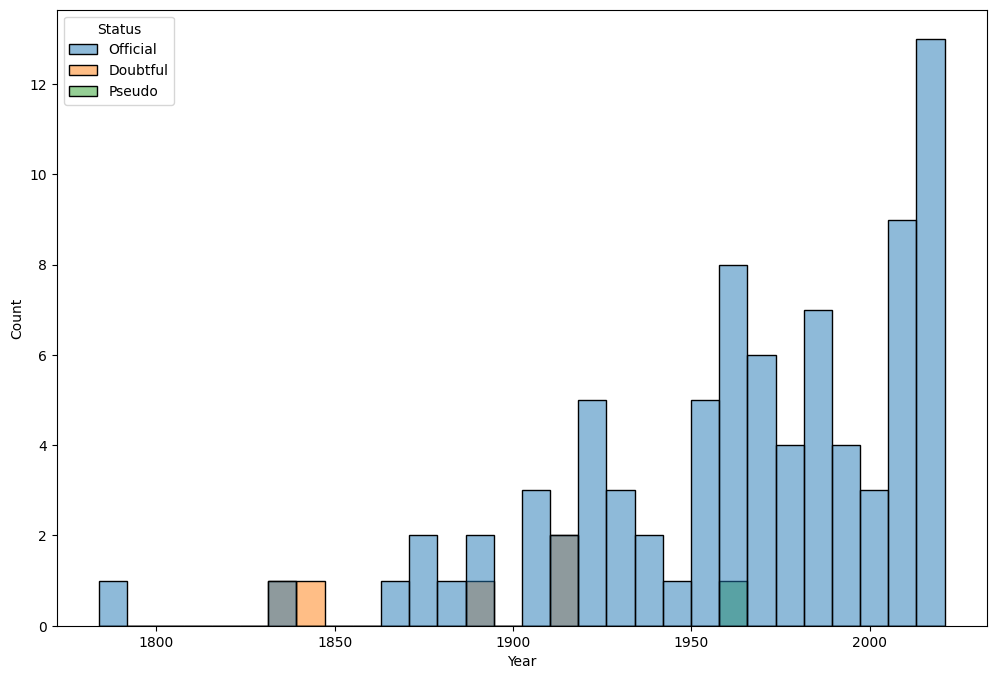

In [50]:
g = sns.histplot(data=df_valid_years, x="Year", bins=30, hue="Status")
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.tick_params(axis='x', labelrotation = 90)
#g.set_yticklabels(labels= [1, 2, 3])
g.figure.set_size_inches(12, 8)

Quando observados indivudualmente, os registros anuais de meteoritos do Brasil contabilizam de 1 a 4. Assim, foi adotado um agrupamento de contagem a cada 30 anos. Pode-se perceber um maior número de meteoritos registrados entre 1900 até os dias atuais, de modo que o século XXI apresenta o maior número. Outra observação é que, através da legenda, obtém-se o status do meteorito. 

Obs2.: a coloração roxa foi uma mistura de duas classificações(?)
Obs3.: Os anos vão de 1732 a 2021.

#### Explorando a idade de alguns outros meteoritos 
Dos 100 registros observados, 11 não foram contabilizados como entradas para a análise da quantidade de meteoritos/ano. Vamos observá-los: